In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
fake = pd.read_csv("D:\projects\Fake-News-Detection\Fake-News-Detection\Fake.csv")
real = pd.read_csv("D:\projects\Fake-News-Detection\Fake-News-Detection\True.csv")

fake["label"] = 0
real["label"] = 1

data = pd.concat([fake, real])
data = data.sample(frac=1).reset_index(drop=True)

data.head()


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\princ\AppData\Local\Temp\ipykernel_2848\2504988629.py:1: SyntaxWarning: invalid escape sequence '\p'
  fake = pd.read_csv("D:\projects\Fake-News-Detection\Fake-News-Detection\Fake.csv")
C:\Users\princ\AppData\Local\Temp\ipykernel_2848\2504988629.py:2: SyntaxWarning: invalid escape sequence '\p'
  real = pd.read_csv("D:\projects\Fake-News-Detection\Fake-News-Detection\True.csv")


,title,text,subject,date,label
0,Naked Man Rants About Trump In Times Square,"We all know that Trump supporters are crazy, b...",News,"June 30, 2016",0
1,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
2,Merkel says to begin three-way German coalitio...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"October 9, 2017",1
3,AWESOME! STREET ARTIST SABO TARGETS Hollywood ...,Protesters gathered Friday in Los Angeles for ...,politics,"Jan 21, 2017",0
4,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,President Donald Trump is a man in a hurry. Th...,politics,"Feb 15, 2017",0


In [5]:
data.shape


(44898, 5)

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data["text"] = data["text"].apply(clean_text)


In [7]:
X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [9]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [10]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9861915367483296

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4739
           1       0.98      0.99      0.99      4241

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



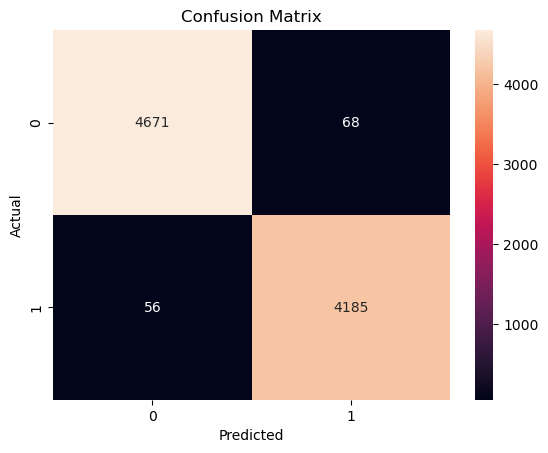

In [11]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
def predict_news(news):
    news = clean_text(news)
    vector = vectorizer.transform([news])
    prediction = model.predict(vector)
    return "Real News" if prediction[0] == 1 else "Fake News"

predict_news("Breaking: Government announces economic reform")


'Fake News'